# Data Mining Project Title: Salary Prediction

## Submitted by: Hamna Qaseem

## Roll No: 1012 - MORA

# Course Instructor: Ma'am Farkhanda

# --------------------------------------------------------------------------------------------------------

## importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## read dataset

In [3]:
df=pd.read_csv("survey_results_public.csv")
df.head()

Respondent                                         MainBranch Hobbyist   
0           1                     I am a developer by profession      Yes  \
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country   
0   NaN         13  Monthly        NaN            NaN             Germany  \
1   NaN         19      NaN        NaN            NaN      United Kingdom   
2   NaN         15      NaN        NaN            NaN  Russian Federation   
3  25.0         18      NaN        NaN            NaN             Albania   
4  31.0         16      NaN        NaN            NaN       United States   

     CurrencyDesc  ...                  SurveyEase           SurveyLength   
0   European Euro  ...  Neither easy nor difficult  Appropriate in length  \
1  Pound sterling  ...                         NaN                    NaN   
2             NaN  ...  Neither easy nor difficult  Appropriate in length   
3    Albanian lek  ...                         NaN                    NaN   
4             NaN  ...                        Easy              Too short   

  Trans                                     UndergradMajor   
0    No  Computer science, computer engineering, or sof...  \
1   NaN  Computer science, computer engineering, or sof...   
2   NaN                                                NaN   
3    No  Computer science, computer engineering, or sof...   
4    No  Computer science, computer engineering, or sof...   

  WebframeDesireNextYear    WebframeWorkedWith   
0           ASP.NET Core  ASP.NET;ASP.NET Core  \
1                    NaN                   NaN   
2                    NaN                   NaN   
3                    NaN                   NaN   
4   Django;Ruby on Rails         Ruby on Rails   

                              WelcomeChange WorkWeekHrs YearsCode YearsCodePro  
0   Just as welcome now as I felt last year        50.0        36           27  
1  Somewhat more welcome now than last year         NaN         7            4  
2  Somewhat more welcome now than last year         NaN         4          NaN  
3  Somewhat less welcome now than last year        40.0         7            4  
4   Just as welcome now as I felt last year         NaN        15            8  

[5 rows x 61 columns]

# Data Cleaning

In [4]:
## check missing values
missing_values = df.isnull().sum()
print(missing_values)

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64


In [ ]:
# select only relevant columns

# Features selection

In [5]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

Country                                          EdLevel   
0             Germany  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  \
1      United Kingdom     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Russian Federation                                              NaN   
3             Albania  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4       United States     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

  YearsCodePro                                         Employment  Salary  
0           27  Independent contractor, freelancer, or self-em...     NaN  
1            4                                 Employed full-time     NaN  
2          NaN                                                NaN     NaN  
3            4                                                NaN     NaN  
4            8                                 Employed full-time     NaN

In [6]:
# remove missing values
df = df[df["Salary"].notnull()]
df.head()

Country                                            EdLevel   
7    United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  \
9   United Kingdom    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
10  United Kingdom       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
11           Spain  Some college/university study without earning ...   
12     Netherlands  Secondary school (e.g. American high school, G...   

   YearsCodePro          Employment    Salary  
7            13  Employed full-time  116000.0  
9             4  Employed full-time   32315.0  
10            2  Employed full-time   40070.0  
11            7  Employed full-time   14268.0  
12           20  Employed full-time   38916.0

We keep only those rows of Salary column that doesnot contain missing values

# Checking the information that are only relevant columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


## Drop Null values

In [6]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

# just keeping those data who employed as full-time

In [9]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30608 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30608 non-null  object 
 1   EdLevel       30127 non-null  object 
 2   YearsCodePro  30492 non-null  object 
 3   Salary        30608 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


# checking the frequency of each country 

In [10]:
df["Country"].value_counts()

Country
United States     7628
India             2514
United Kingdom    2317
Germany           1994
Canada            1225
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: count, Length: 154, dtype: int64

In [12]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'other'
    return categorical_map

The purpose of this function is to group categories in a categorical variable that have counts below a certain threshold (cutoff) into an "other" category. This can be useful for reducing the number of categories in a variable and simplifying subsequent analysis or modeling tasks.

In [13]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
other                 8717
United States         7628
India                 2514
United Kingdom        2317
Germany               1994
Canada                1225
Brazil                1005
France                 991
Spain                  685
Australia              676
Netherlands            663
Poland                 571
Italy                  562
Russian Federation     538
Sweden                 522
Name: count, dtype: int64

from the output it can be seen that the countries that are occuring less removed from the list

# Exploratory Data Analysis

In [14]:
# counting occurence of each country
country_counts = df['Country'].value_counts()

## Visualize top countries

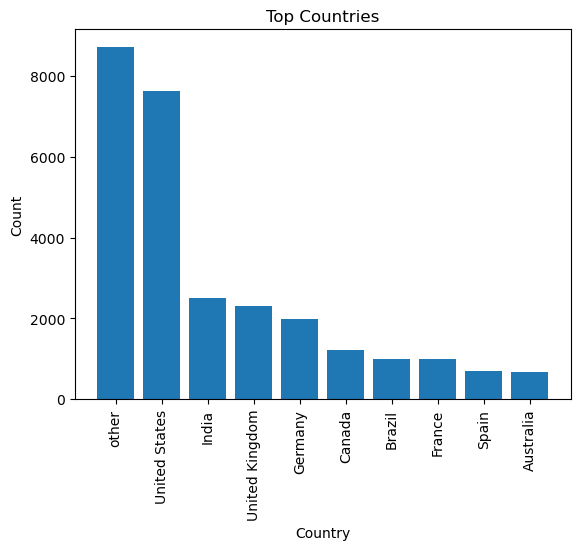

In [15]:
import matplotlib.pyplot as plt

top_countries = country_counts.head(10) 
plt.bar(top_countries.index, top_countries.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top Countries')
plt.xticks(rotation=90)
plt.show()

In [16]:
# now count the occurence of education level
edlevel_counts = df['EdLevel'].value_counts()

## Distribution of Education level

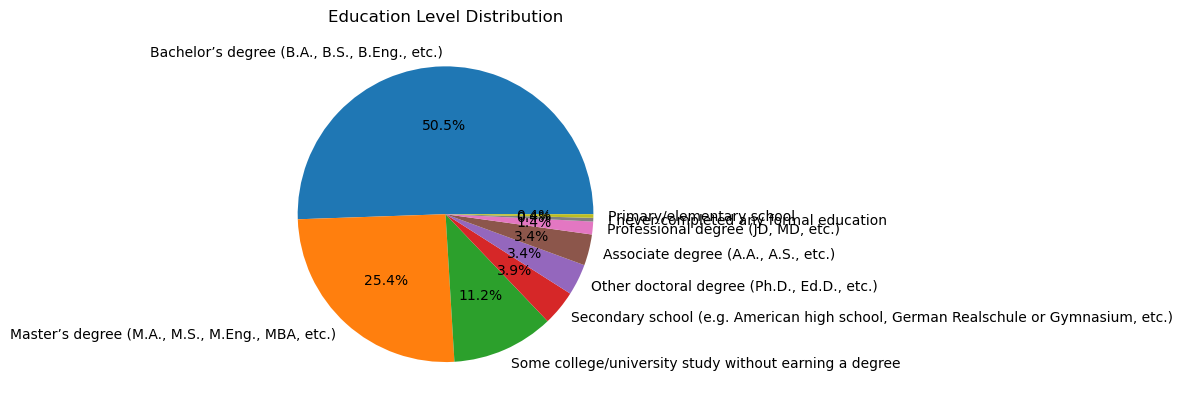

In [17]:
plt.pie(edlevel_counts.values, labels=edlevel_counts.index, autopct='%1.1f%%')
plt.title('Education Level Distribution')
plt.show()

In [20]:
# Summary statistics
yearscodepro_stats = df['YearsCodePro'].describe()
yearscodepro_stats

count     30492
unique       51
top           3
freq       3263
Name: YearsCodePro, dtype: object

# Count mean, median, mode

In [23]:
salary_stats = df['Salary'].describe()
salary_stats

count    3.060800e+04
mean     1.074026e+05
std      2.351747e+05
min      0.000000e+00
25%      2.594400e+04
50%      5.497200e+04
75%      9.600000e+04
max      2.000000e+06
Name: Salary, dtype: float64

# Box Plot

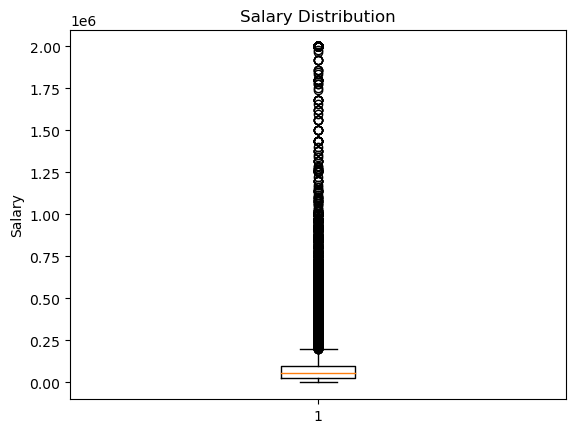

In [24]:
plt.boxplot(df['Salary'])
plt.ylabel('Salary')
plt.title('Salary Distribution')
plt.show()

# Salary Vs Country

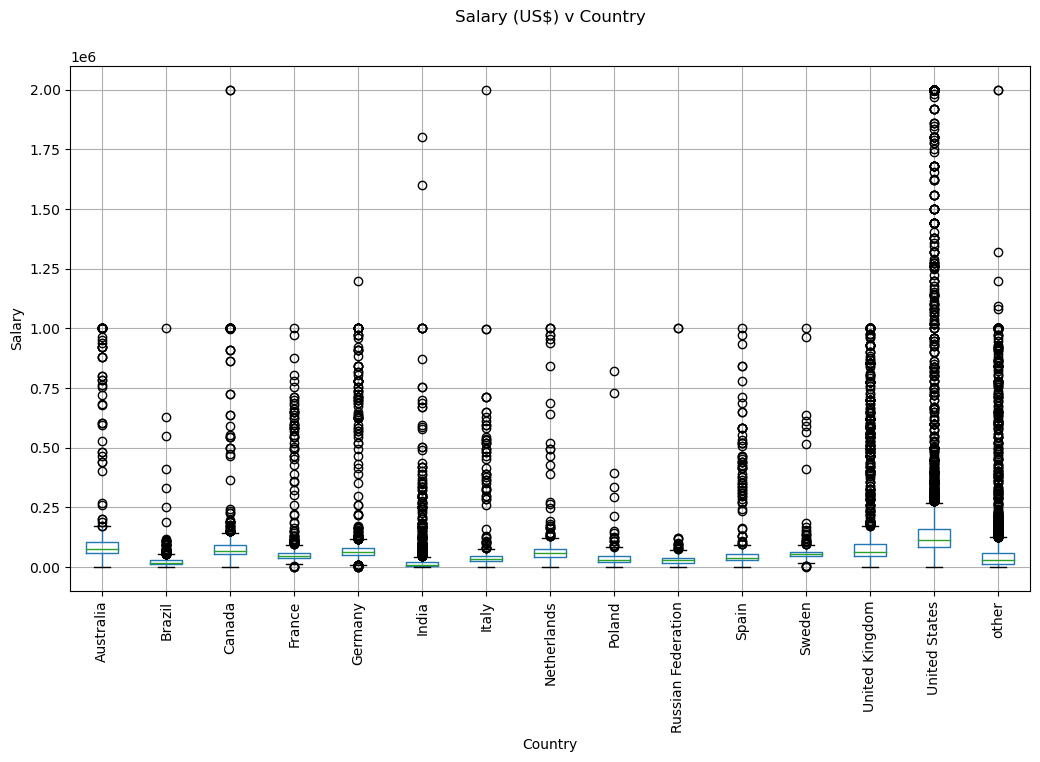

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [25]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != 'Other']

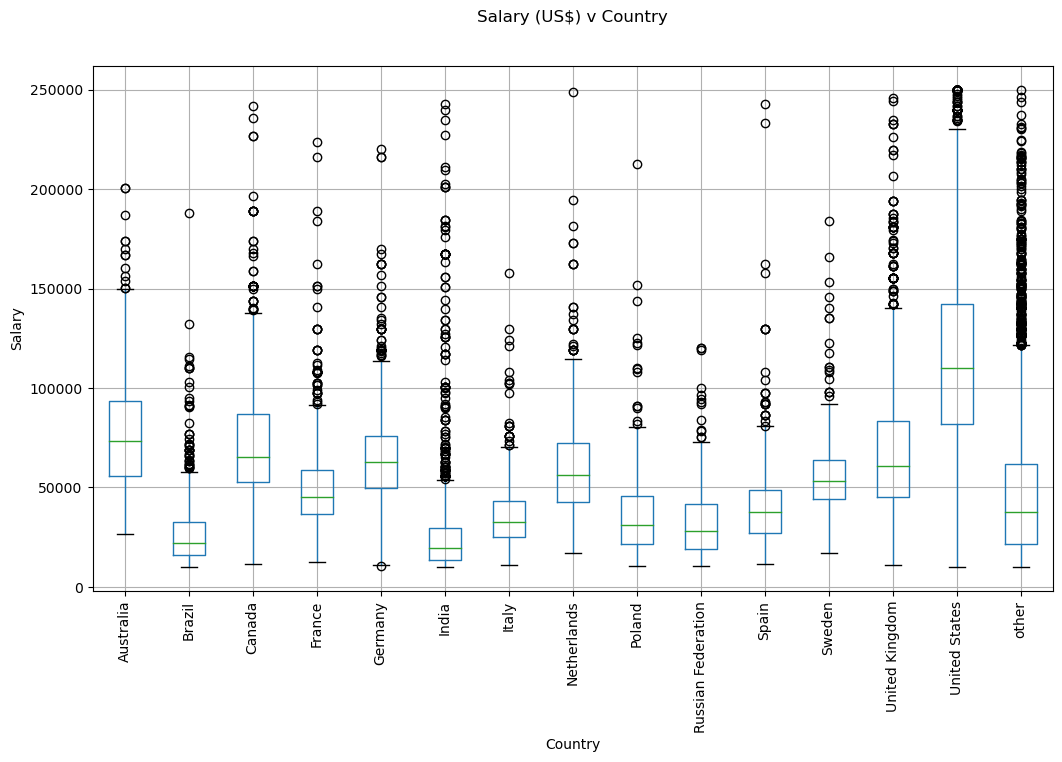

In [26]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [27]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '14', '12', '29', '6',
       '28', '8', '23', '15', '25', '5', '9', '11', 'Less than 1 year',
       '21', '16', '18', '32', '19', '22', '38', '30', '26', '17', nan,
       '27', '24', '34', '35', '33', '36', '40', '39',
       'More than 50 years', '31', '37', '41', '45', '42', '44', '43',
       '50', '49', '47'], dtype=object)

In [28]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [29]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', nan,
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

# Apriori Algorithm

In [35]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 1.0 MB/s eta 0:00:00


In [36]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [37]:
# Convert the dataset into a list of transactions
transactions = df.values.tolist()

In [39]:
df = df.astype(str)

In [40]:
df.dropna(inplace=True)  # Drop rows with missing values

In [41]:
te = TransactionEncoder()
te_ary = te.fit_transform(df.values.tolist())
encoded_df = pd.DataFrame(te_ary, columns=te.columns_)

In [42]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(encoded_df, min_support=0.1, use_colnames=True)

In [43]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [45]:
# Display the frequent itemsets and association rules
print("Frequent Itemsets")
frequent_itemsets

Frequent Itemsets


support                                           itemsets
0  0.480569     (Bachelor’s degree (B.A., B.S., B.Eng., etc.))
1  0.262622  (Master’s degree (M.A., M.S., M.Eng., MBA, etc.))
2  0.111744  (Some college/university study without earning...
3  0.266651                                    (United States)
4  0.271494                                            (other)
5  0.158356  (United States, Bachelor’s degree (B.A., B.S.,...
6  0.125228  (other, Bachelor’s degree (B.A., B.S., B.Eng.,...

In [46]:
print("\nAssociation Rules:")
rules


Association Rules:


antecedents   
0                                 (United States)  \
1  (Bachelor’s degree (B.A., B.S., B.Eng., etc.))   

                                      consequents  antecedent support   
0  (Bachelor’s degree (B.A., B.S., B.Eng., etc.))            0.266651  \
1                                 (United States)            0.480569   

   consequent support   support  confidence      lift  leverage  conviction   
0            0.480569  0.158356    0.593868  1.235761  0.030211    1.278972  \
1            0.266651  0.158356    0.329517  1.235761  0.030211    1.093762   

   zhangs_metric  
0       0.260152  
1       0.367290

# Machine Learning Models

In [117]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 2, 1, 3], dtype=int64)

In [118]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13, 12, 10,  7,  4,  2, 14,  6,  1,  3,  5, 11,  8,  0,  9],
      dtype=int64)

In [119]:
X = df.drop('Salary', axis=1)
y = df['Salary']

# Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [121]:
y_pred = linear_reg.predict(X)

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [123]:
error

42464.12049327694

# Decision Tree

In [124]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [125]:
y_pred = dec_tree_reg.predict(X)

In [126]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,867.68


In [127]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [128]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,786.66


In [129]:
X

Country  EdLevel  YearsCodePro
7           13        0          13.0
9           12        2           4.0
10          12        0           2.0
11          10        1           7.0
12           7        1          20.0
...        ...      ...           ...
64129       13        2           4.0
64135       14        0           4.0
64148       14        0           5.0
64153       14        0           3.0
64154       14        0           0.5

[25374 rows x 3 columns]

In [135]:
X =np.array([["United States", "Master's degree", 15]])
X

array([['United States', "Master's degree", '15']], dtype='<U15')

In [131]:
valid_value = ["United States"]
le_country.classes_ = np.append(le_country.classes_, valid_value)

In [133]:
valid_value = ["Master's degree"]
le_education.classes_ = np.append(le_education.classes_, valid_value)

In [136]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X =X.astype(float)
X

array([[15.,  4., 15.]])

In [137]:
y_pred = regressor.predict(X)
y_pred

C:\Users\Hamna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([72864.95652174])

In [138]:
import pickle

In [139]:
data = {"model":regressor, "le_country": le_country, "le_education": le_education}
with open("saved_steps.pkl", 'wb') as file:
    pickle.dump(data, file)

In [140]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [141]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\Hamna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([72864.95652174])